In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

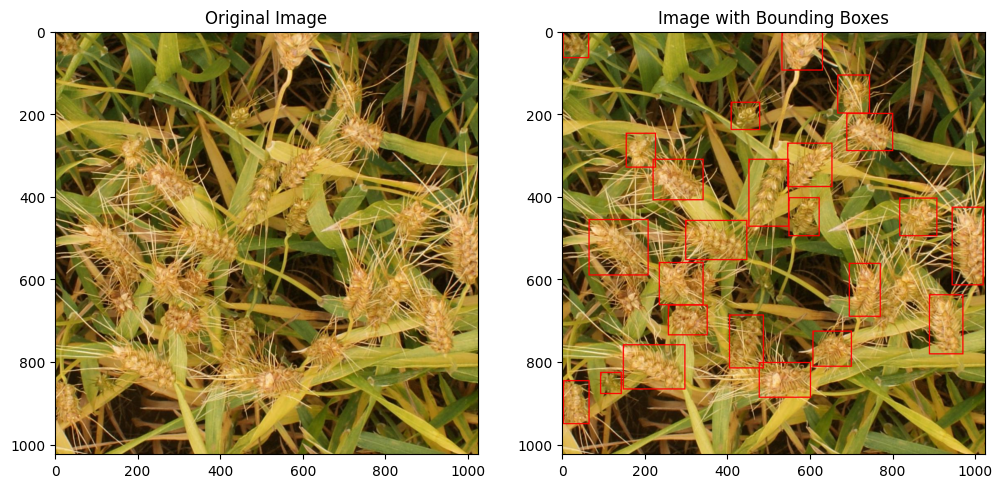

In [ ]:
# Load the pre-trained Faster R-CNN model
model_path = "fasterrcnn_resnet50_fpn_kelompok2.pth"
model_state_dict = torch.load(model_path)

# Initialize the model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
in_features = model.roi_heads.box_predictor.cls_score.in_features
num_classes = 2  # Update this to match the number of classes in your dataset
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Load the state dictionary into the modified model
model.load_state_dict(model_state_dict)
model.eval()

# Function to get the model's predictions
def get_predictions(img_path, model, threshold=0.5):
    # Load the image
    img = Image.open(img_path).convert("RGB")

    # Define the transformation
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img)

    # Get predictions
    with torch.no_grad():
        predictions = model([img_tensor])

    # Get the scores, labels, and bounding boxes
    pred_scores = predictions[0]['scores'].numpy()
    pred_labels = predictions[0]['labels'].numpy()
    pred_boxes = predictions[0]['boxes'].numpy()

    # Filter out predictions below the threshold
    pred_threshold = pred_scores >= threshold
    pred_scores = pred_scores[pred_threshold]
    pred_labels = pred_labels[pred_threshold]
    pred_boxes = pred_boxes[pred_threshold]

    return img, pred_boxes, pred_labels, pred_scores

# Function to draw bounding boxes on the image
def draw_boxes(img, boxes, labels):
    draw = ImageDraw.Draw(img)
    for box, label in zip(boxes, labels):
        draw.rectangle(box.tolist(), outline="red", width=3)
        draw.text((box[0], box[1]), str(label), fill="red")
    return img

# Path to your image
img_path = "global-wheat-detection/test/f5a1f0358.jpg"

# Get predictions
original_img, boxes, labels, scores = get_predictions(img_path, model)

# Draw boxes on the image
img_with_boxes = draw_boxes(original_img.copy(), boxes, labels)

# Display the original and the image with bounding boxes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_img)

plt.subplot(1, 2, 2)
plt.title("Image with Bounding Boxes")
plt.imshow(img_with_boxes)

plt.show()
